In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Set parameters
image_size = (150, 150)  
batch_size = 16         
epochs = 1        


# Data generators with augmentations (optional, can be tuned)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow from directory (use the directory containing 'real' and 'fake' folders)
train_generator = train_datagen.flow_from_directory(
    'Dataset2/real_vs_fake/real-vs-fake/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    'Dataset2/real_vs_fake/real-vs-fake/valid',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Model definition
base_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 10:
        return lr * 0.1
    else:
        return lr * 0.01

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[LearningRateScheduler(scheduler), early_stopping]
)

# Model evaluation
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predictions and classification report
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))



Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4604s 736ms/step - accuracy: 0.6848 - loss: 0.5965 - val_accuracy: 0.7355 - val_loss: 0.5252 - learning_rate: 0.0010
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 730s 584ms/step - accuracy: 0.7774 - loss: 0.4800
Validation Accuracy: 73.55%
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 875s 699ms/step
Classification Report:
              precision    recall  f1-score   support

        fake       0.71      0.79      0.75     10000
        real       0.77      0.68      0.72     10000

    accuracy                           0.74     20000
   macro avg       0.74      0.74      0.73     20000
weighted avg       0.74      0.74      0.73     20000



**LETS MAKE PREDICIONS NOW**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


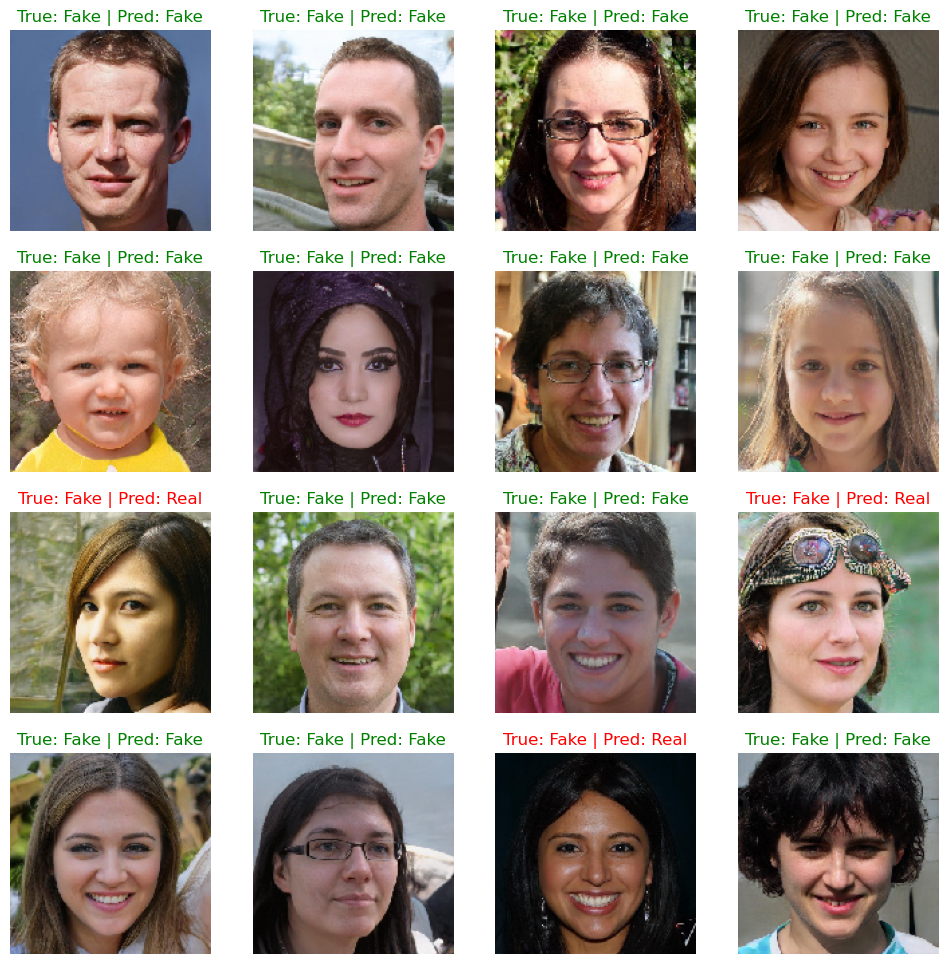

In [13]:
# Visualization of some predictions
def visualize_predictions(generator, model, num_images=16):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        img, label = generator[i]  # Get a batch of images and labels
        prediction = model.predict(img)  # Predict the class for the images
        predicted_label = np.argmax(prediction, axis=1)  # Get the predicted labels

        # Compare predicted labels with true labels
        for j in range(len(predicted_label)):
            color = "green" if predicted_label[j] == np.argmax(label[j]) else "red"
            plt.subplot(4, 4, i + 1)
            plt.imshow(img[j])
            plt.title(f"True: {['Fake', 'Real'][np.argmax(label[j])]} | Pred: {['Fake', 'Real'][predicted_label[j]]}", color=color)
            plt.axis("off")
    plt.show()

# Call the function to visualize predictions
visualize_predictions(val_generator, model)


**FINAL PHASE: PLOT ACCURACY PLOTS AND FIND ACCURACY**

Training Loss: 0.5456, Training Accuracy: 0.7210
Validation Loss: 0.5252, Validation Accuracy: 0.7355
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7942s 1s/step
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 755s 604ms/step


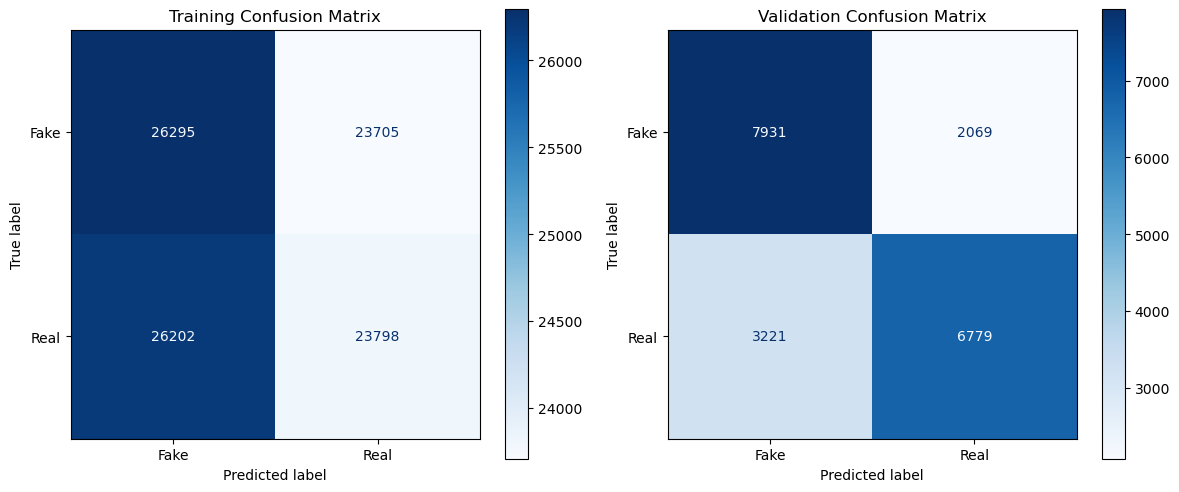

Training Accuracy: 0.7210
Validation Accuracy: 0.7355


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(train_generator, verbose=0)
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Predictions for training data
train_preds = model.predict(train_generator)
train_pred_labels = np.argmax(train_preds, axis=1)

# Predictions for validation data
val_preds = model.predict(val_generator)
val_pred_labels = np.argmax(val_preds, axis=1)

# True labels for training data
train_true_labels = train_generator.classes
# True labels for validation data
val_true_labels = val_generator.classes

# Confusion Matrix for training data
train_cm = confusion_matrix(train_true_labels, train_pred_labels)
# Confusion Matrix for validation data
val_cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Training Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=['Fake', 'Real']).plot(ax=ax[0], cmap='Blues', values_format='.0f')
ax[0].set_title('Training Confusion Matrix')

# Validation Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=val_cm, display_labels=['Fake', 'Real']).plot(ax=ax[1], cmap='Blues', values_format='.0f')
ax[1].set_title('Validation Confusion Matrix')

plt.tight_layout()
plt.show()

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
